 # 교차 검증(Cross validation)
 일반화 성능을 재기 위해서 
 
 훈련세트와 테스트 세트로 한 번만 나눠서 한번만 훈련, 평가하는 것이 아니라 
 
 데이터를 여러번 반복해서 나누고 여러 번 학습, 평가합니다.
 
 따라서 더 안정적이고 뛰어난 통계적 평가 방법이라 할 수 있습니다. 

# 1. 교차 검증의 종류 , 교차 검증 분할기
# 1-1. k-겹 교차 검증
먼저 데이터를 k개의 폴드(Fold;전체 데이터를 거의 비슷한 크기로 나눈 부분집합 k개)로 나눕니다.

그 중 하나를 테스트 세트로 나머지를 트레인 세트로 해서 총 k번의 학습과 평가를 하게 됩니다.

그 결과로 k개의 정확도 값이 나옵니다. 

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from inspect import signature as sig
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [6]:
iris = load_iris()
logreg = LogisticRegression() # 모델 생성
scores = cross_val_score(logreg, iris.data, iris.target) # 매개변수로 모델과 feature, 레이블을 넣고 학습, 평가
# --> 단 이 함수는 모델을 반환하지는 않고 평가 점수만을 반환한다.
print("cross validation scores : ", scores) # fold 개수의 디폴트값이 5개이므로 5개의 정확도 점수가 나옴
# 폴드에 따라 비교적 차이가 큰(0.93~1) 이유는 모델이 폴드에 과적합되었거나 데이터 셋이 작기 때문일 수 있습니다.

cross validation scores :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
iris = load_iris()
logreg = LogisticRegression() # 모델 생성
scores = cross_val_score(logreg, iris.data, iris.target, cv = 3) # cv 매개변수로 fold 개수를 지정해줄 수 있다.
print("cross validation scores : ", scores)
print("mean of scores: ", scores.mean()) # 그룹 함수로 점수의 평균을 보자.

cross validation scores :  [0.98 0.96 0.98]
mean of scores:  0.9733333333333333


* 교차 검증의 장점 

테스트 세트에 각 관측치(샘플)이 정확하게 한 번씩 들어가보기 때문에 

훈련세트에는 분류하기 어려운 샘플만 들어가고 테스트 세트에는 분류하기좋은 샘플만 들어간다거나 

희귀한 샘플이 테스트 세트에만 들어간다거나 하는 일이 없다. 

교차 검증의 평균값을 높이기 위해서는 데이터셋에 있는 모든 폴드, 샘플에 대해서 모델이 잘 일반화 되어야 한다. 

따라서 교차 검증을 통해 일반화 성능을 볼 수 있다고 하는 것이다.

-> 폴드 수를 늘릴 수록(데이터를 여러 개로 나눌 수록) 모델이 훈련데이터에 얼마나 민감한지 알 수 있습니다. 최악과 최선의 경우를 짐작 가능합니다.

-> 폴드 수를 늘릴 수록(데이터를 여러 개로 나눌 수록) 학습에 사용하는 데이터(관측치)가 많아져 더 정확한 모델을 만들 것이라 기대할 수 있습니다.

# 1-2. 계층별 k-겹 교차 검증(Stratified k-fold cross-validation)
계층별 교차 검증에서는 폴드 안의 클래스의 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다.

따라서 k-겹 교차 검증보다 더 안정적입니다. (일반화에 좋습니다.)

기본적으로 분류에서는 StratifiedKFold를 사용해 훈련 세트와 테스트 세트를 나누고 회귀에서는 단순한 KFold를 적용합니다. 

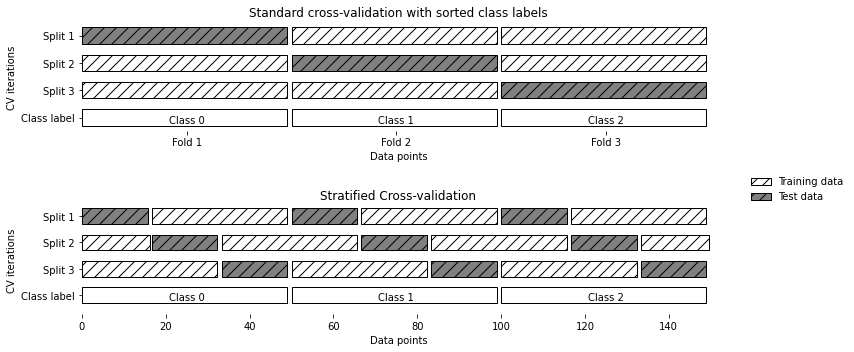

In [18]:
mglearn.plots.plot_stratified_cross_validation()

KFold에서 shuffle 매개변수를 기본값 False 대신 True로 지정하면 폴드를 나누기 저에 무작위로 섞을 수 있습니다. 또한 random_state 매개변수를 고정해서 똑같은 작업을 재현할 수 있습니다. 

하지만 cross_val_score 함수를 사용할 때 KFold의 매개변수를 제어할 방법은 없습니다. 

이를 위해서는 따로 KFold 객체(교차검증분할기;Cross-validation splitter)를 만들어 매개변수를 제어해준 다음에 그 객체를 cross_val_score 함수의 cv 매개변수로 전달해야 합니다. 

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
print(cross_val_score(logreg,iris.data, iris.target, cv = kfold))
scores = cross_val_score(logreg,iris.data, iris.target, cv = kfold)
print(scores.mean())

skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
print(cross_val_score(logreg,iris.data, iris.target, cv = skfold))
scores = cross_val_score(logreg,iris.data, iris.target, cv = kfold)
print(scores.mean())

[1.         0.83333333 1.         1.         0.93333333]
0.9533333333333334
[0.96666667 0.96666667 0.96666667 0.96666667 0.93333333]
0.9533333333333334


# 1-3. LOOCV
폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증
데이터 셋이 클때는 시간이 매우 오래 걸리지만, 데이터 셋이 작을 때 일반화성능이 안좋은 점을 보완할 수 있다는 장점이 있다. 

In [21]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data, iris.target, cv = loo)
print(scores)
print("how many split : ", len(scores))
print(scores.mean())
# 확실히 오래걸리는구만...

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
how many split :  150
0.9666666666666667


# 1-4. 임의 분할 교차 검증(shuffle-split cross-validation)
train_size 만큼의 포인트로 훈련 세트를 만들고, test_size 만큼의 포인트(훈련세트와 중첩되지 않는)로 테스트 세트를 만들도록 분할합니다.

정수를 입력하면 데이터 포인트의 절대 개수를 의미하며, 0-1사이의 실수를 입력하면 전체 데이터에서의 비율을 나타냅니다.

-> 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용합니다.

-> 또한 train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용할 수 있습니다. 이렇게 데이터를 부분 샘플링(subsampling)하는 방식은 대규모 데이터셋을 작업할 때 유용합니다.

ShuffleSplit의 계층별 버전으로 분류 작업에 적합한 StratifiedShuffleSplit도 있습니다.

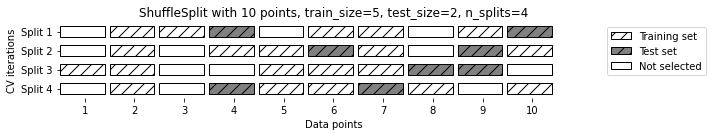

In [19]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10, random_state = 0) 
# 기본적으로 shuffle이므로 shuffle 매개변수는 없다. 
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수 : ", scores.mean())

교차 검증 점수 :  0.9626666666666667


# 1-5. 그룹별 교차 검증
예를 들어 여러 사람의 얼굴 사진을 보고 표정을 인식하는 시스템을 만든다고 할 때,

학습하지 않은 다른 사람의 얼굴에 대한 일반화 성능을 정확하게 평가하기 위해 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야 합니다.

-> 사진의 사람이 누구인지 기록한 배열을 groups 매개변수로 전달합니다. 

-> 이 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹으로 지정하는 것이다.

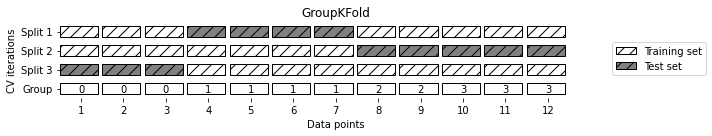

In [25]:
mglearn.plots.plot_group_kfold()

In [26]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples =12, random_state = 0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits=3))
print(scores)

[0.75       0.6        0.66666667]


# 2. 그리드 서치(grid search) _ 매개변수 튜닝
모델에서 최적의(일반화 성능을 최대로 높여주는) 매개변수 값을 찾기 위해 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것 

평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요합니다. (테스트 세트를 활용해서 어떠한 선택을 했다면, 그것은 테스트 세트의 정보를 모델에 누설한 것입니다. 따라서 최종 평가에만 사용하도록 테스트 세트를 분리해 유지하는 것이 중요합니다.)

데이터를 훈련용, 검증용, 테스트용으로 3개로 나눕니다.

- 훈련 세트로는 모델을 만들고

- 검증 세트로는 최적의 매개변수를 찾고

- 이때, 최적의 매개변수를 설정하고 훈련세트와 검증세트 데이터를 모두 이용해 모델을 새로 학습시킵니다.(새로운 모델) 
  
      -> 모델을 만들 때 가능한 한 많은 데이터를 이용하기 위함

- 마지막으로 테스트 세트로 앞서 만든 새로운 모델의 성능을 평가합니다. 


In [28]:
from sklearn.svm import SVC
# 데이터를 훈련용, 검증용, 테스트용으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print(X_train.shape[0],"\n", X_valid.shape[0], "\n" ,X_test.shape[0])

84 
 28 
 38


In [29]:
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score :
            best_score = score 
            best_parameters = {'C':C, 'gamma':gamma}
print(best_score) # 검증세트에서의 최고점수
print(best_parameters) #최적의 파라미터

0.9642857142857143
{'C': 10, 'gamma': 0.001}


In [31]:
# 훈련세트와 검증세트를 합쳐 새롭게 학습을 시킨 모델을 
# 테스트 셋을 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(test_score)

0.9210526315789473


# 2-1. 교차 검증을 사용한 그리드 서치
일반화 성능을 더 잘 평가 하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고 교차 검증을 사용해 각 매개변수 조합의 성능을 평가할 수 있습니다. 

교차 검증은 단지 모델의 성능을 평가하기 위한 방법이다. 하지만 그리드 서치와 가은 매개변수 탐색 방법과 합쳐서 많이 사용되기 때문에 많은 사람들이 교차 검증이란 용어를 교차검증을 사용한 그리드 서치라는 의미로 주로 사용합니다.

In [33]:
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        if score > best_score : 
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
svm.score(X_test, y_test)

0.9736842105263158

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

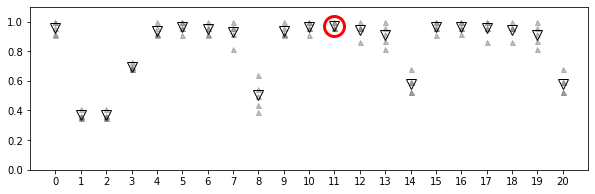

In [35]:
mglearn.plots.plot_cross_val_selection()
# 평균 정확도가 가장 높게 나온 매개변수 값을 채택

# GridSearchCV 객체
교차 검증을 사용한 그리드 서치를 할 수 있는 추정기 객체

GridSearchCV 객체의 fit 메서드는 최적의 매개변수를 찾는 일뿐만 아니라, 최적의 매개 변수로 전체 훈련 데이터 세트를 학습시킨 새로운 모델을 만들어 반환합니다. 

GridSearchCV 객체는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict 메서드와 score 메서드를 제공합니다.

GridSearchCV도 분류에는 StratifiedKFold를, 회귀에는 KFold를 기본값으로 사용합니다. 하지만 cv 매개변수를 통해 다른 교차 검증 분할기(ex: ShuffleSplit/ StratifiedShuffleSplit)를 사용할 수도 있습니다.

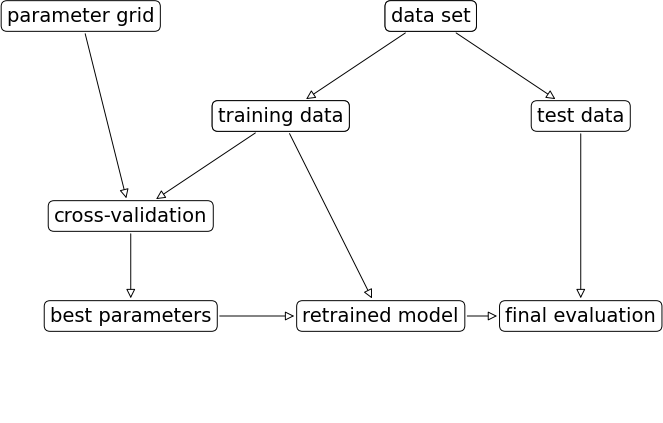

In [37]:
mglearn.plots.plot_grid_search_overview()

In [39]:
# 딕셔너리 형태로 검색 대상 매개변수를 지정
param_grid = {'C' :[0.001,0.01,0.1,1,10,100], 'gamma' : [0.001,0.01,0.1,1,10,100]}
print("매개변수 그리드 :", param_grid) 

매개변수 그리드 : {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [40]:
# GridSearchCV 객체를 생성 - 매개변수 : 모델, 매개변수 그리드, 폴드 수
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [42]:
# 데이터를 훈련/검증용과 테스트용으로 나누고, 훈련/검증 세트로 교차검증을 통해 최적의 매개변수를 찾고 훈련+검증 전체 데이터로 학습까지 한다. 
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [43]:
# 마지막에 해보기!
# # 테스트 세트를 넣어 평가한다.
# grid_search.score(X_test, y_test)

0.9736842105263158

In [48]:
print("최적의 파라미터/매개변수 :",grid_search.best_params_)
print("검증할 때 나온 최적의 매개변수를 설정했을 때의 정확도 : ",grid_search.best_score_)
print("최종적으로 나온, 최적의 매개변수에서 전체 훈련세트를 사용하여 학습한 모델 : ", grid_search.best_estimator_)

최적의 파라미터/매개변수 : {'C': 10, 'gamma': 0.1}
검증할 때 나온 최적의 매개변수를 설정했을 때의 정확도 :  0.9731225296442687
최종적으로 나온, 최적의 매개변수에서 전체 훈련세트를 사용하여 학습한 모델 :  SVC(C=10, gamma=0.1)


In [49]:
# 그리드 서치의 결과는 cv_results_ 속성에 담겨 있습니다. 데이터 프레임으로 변환해서 보는 것이 좋습니다.
results = pd.DataFrame(grid_search.cv_results_)
results.head(25)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003058,0.000947,0.001321,0.000554,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.002548,0.000659,0.000896,0.000282,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.002307,0.001068,0.000785,0.000183,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001729,0.000505,0.000841,0.000373,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.002488,0.000537,0.001200,0.000130,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.002097,0.000188,0.000865,0.000041,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.001684,0.000234,0.000723,0.000142,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.001675,0.000305,0.000707,0.000317,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.001460,0.000241,0.000768,0.000303,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.001437,0.000238,0.000534,0.000051,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


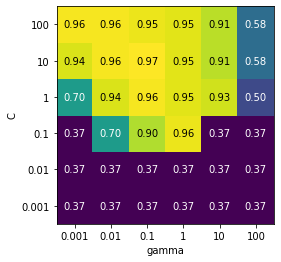

In [53]:
# mean_train_score : ?
# mean_test_score을 히트맵으로 시각화 
# mean_test_score: 매개변수 조합 당 검증 점수 평균 (폴드 스플릿 하나당 하나의 검증 점수가 나옴, validation set으로 테스트한 느낌)
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel ='C', yticklabels=param_grid['C'], cmap='viridis')

-> 매개변수에 따라 정확도가 40%에서 96% 까지 큰 차이가 난다. 즉, 높은 성능을 얻기 위해서 매개변수 조정이 중요하다!

-> 주의 : 매개변수 최적값이 그래프 끝에 놓이지 않도록 매개변수의 범위가 충분히 넓어야 한다.

# 중첩 교차 검증(nested cross-validation)
바깥쪽 루프에서 데이터를 훈련 세트와 테스트(+검증)세트로 나눕니다. 그리고 각 훈련 세트에 대해 그리드 서치를 실행합니다. 

(바깥쪽 루프에서 분할된 훈련 세트마다 최적의 매개변수가 다를 것임)

그런 다음 바깥쪽에서 분할된 테스트 세트를 최적 매개변수 설정의 모델에 넣어서 점수를 측정합니다. 

--> 데이터 셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용


In [55]:
param_grid = {'C' :[0.001,0.01,0.1,1,10,100], 'gamma' : [0.001,0.01,0.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("교차검증점수 : ", scores)
print("교차검증 점수 평균 : ", scores.mean() )

교차검증점수 :  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차검증 점수 평균 :  0.9800000000000001


가장 바깥쪽에 훈련/테스트를 나누는 방법으로 5가지 

그리고 훈련세트 안에서 그리드 서치로 최적의 매개변수를 찾는 매개변수 조합이 6*6=36 가지

한 가지 매개변수 조합에 대해 5가지 폴드 스플릿 방법을 쓰므로

--> 5*5*36 = 900개의 모델이 만들어지게 된다. 